In [1]:
## main script to test
import final_implementation as script
## some required imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# LaneProcessing object have the entire pipeline to make each processing step
laneProcessing = script.LanesProcessing('camera_cal/calibration*.jpg')

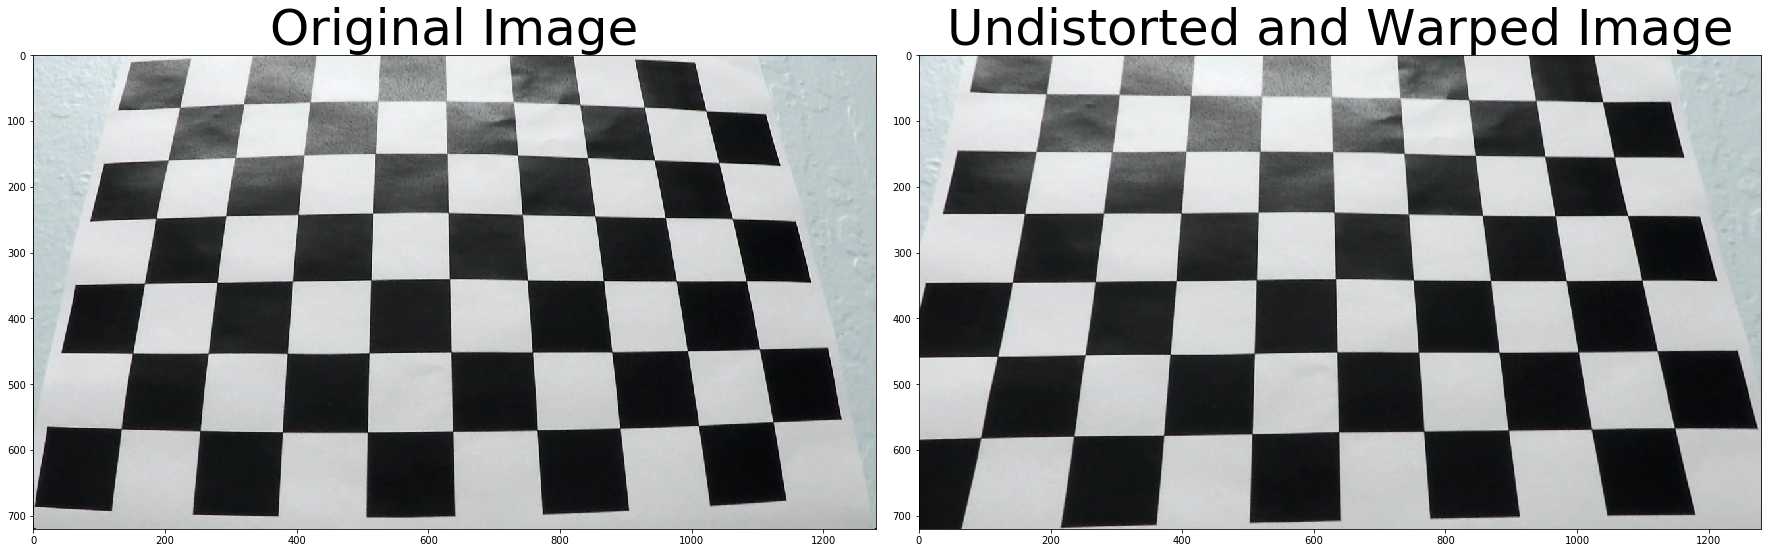

In [3]:
# Test Undistorted and Warped initialization
mtx, dist = (laneProcessing.mtx, laneProcessing.dist)

img_test = cv2.imread('camera_cal/calibration3.jpg')
dst = cv2.undistort(img_test, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Original Image', fontsize=50)
ax2.set_title('Undistorted and Warped Image', fontsize=50)

ax1.imshow(img_test)
ax2.imshow(dst)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

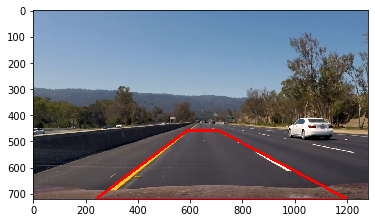

In [4]:
# Adjust parameters to get desired corners for bird_view
bgr_image = cv2.imread('./test_images/img_360.jpg')
img = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]
mid_offset = 94
bottom_offset_left = 250
bottom_offset_right = 140
x_offset = -10

apex_offset = 100
y_apex = (height//2) + apex_offset

left_bottom = (0 + bottom_offset_left + x_offset, height)
right_bottom = (width - bottom_offset_right + x_offset + 70, height)
apex = (((width+100)//2)-mid_offset + x_offset, y_apex)
apex2 = (((width+100)//2)+mid_offset + x_offset - 60, y_apex)
corners = [left_bottom, right_bottom, apex2, apex]

regions = laneProcessing._draw_region(img, corners)
plt.figure()
plt.imshow(regions)

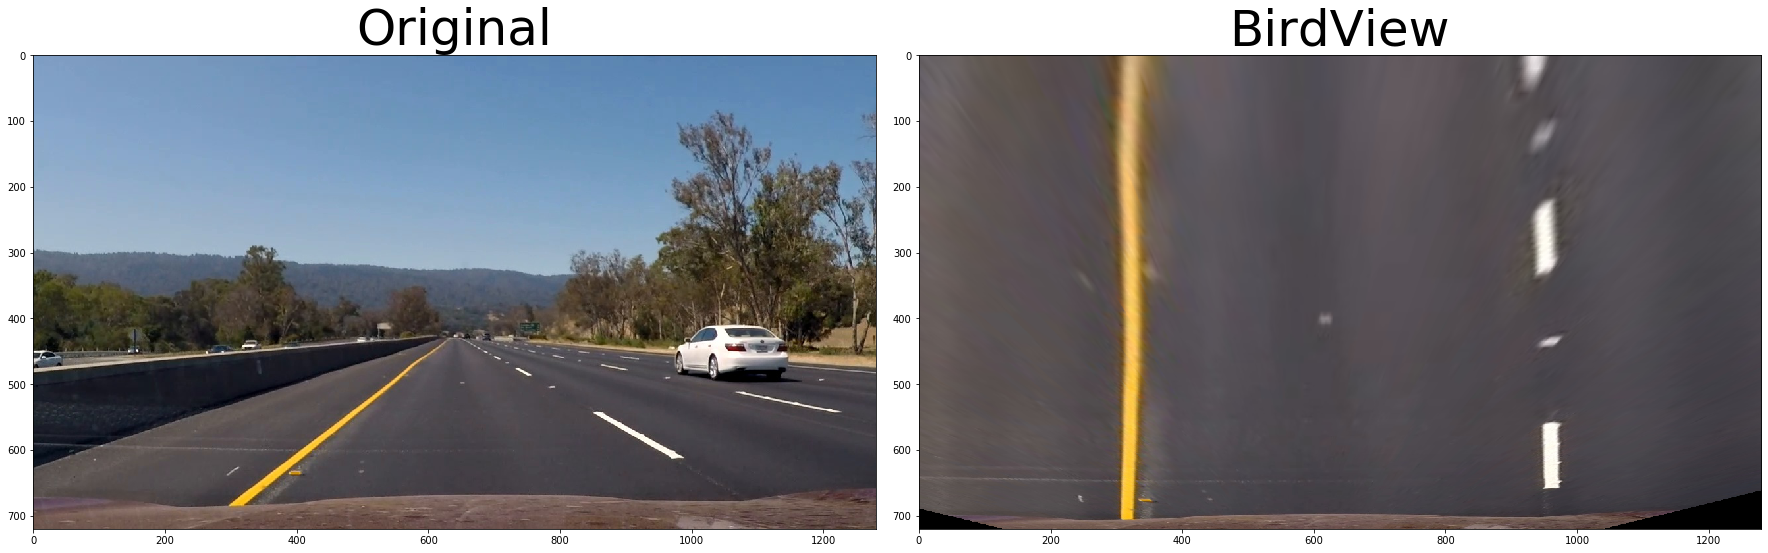

In [5]:
## Test bird_view function
img = cv2.imread('./test_images/img_360.jpg')
result = laneProcessing._bird_view_corners(img, corners)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Original', fontsize=50)
ax2.set_title('BirdView', fontsize=50)

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

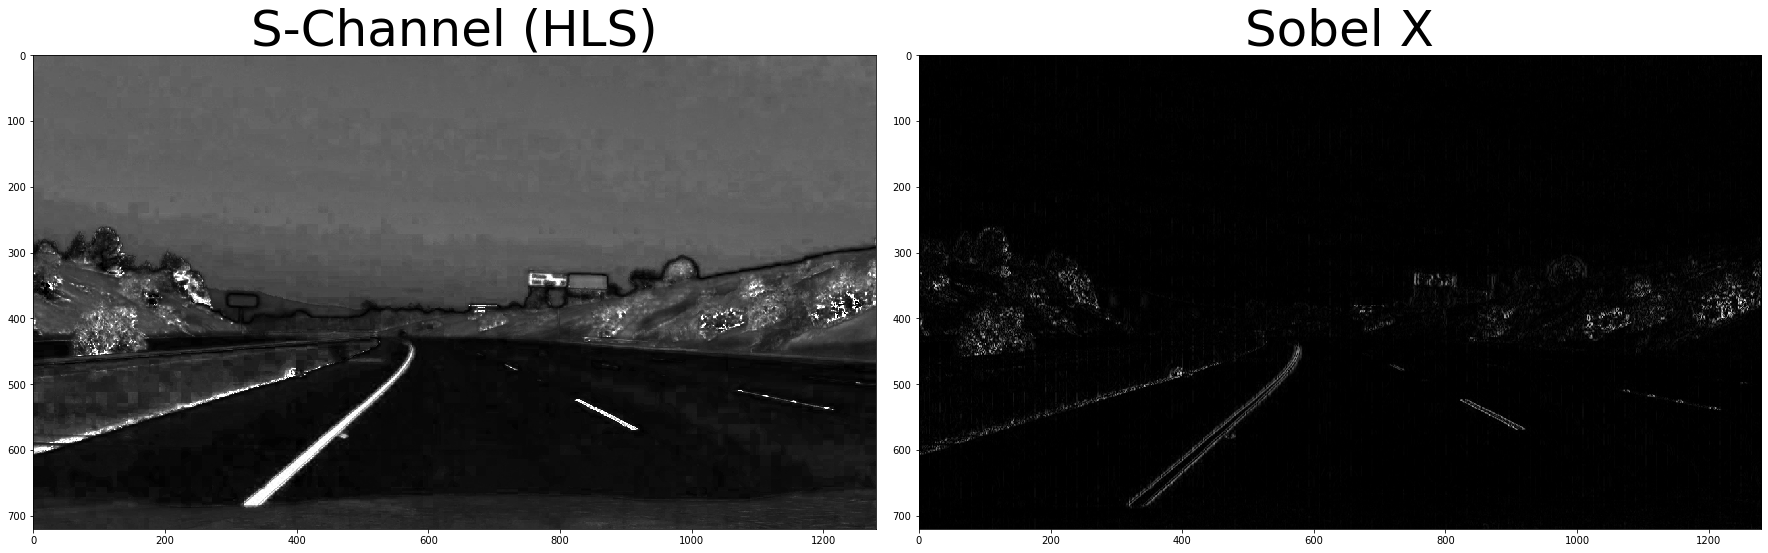

In [6]:
## Test Sobel X operation
img = cv2.imread('./test_images/img_0.jpg')
hls_img_lane = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
selected_channel = hls_img_lane[:,:,2]
result = laneProcessing._sobel_x(selected_channel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('S-Channel (HLS)', fontsize=50)
ax2.set_title('Sobel X', fontsize=50)

ax1.imshow(selected_channel, cmap='gray')
ax2.imshow(result, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

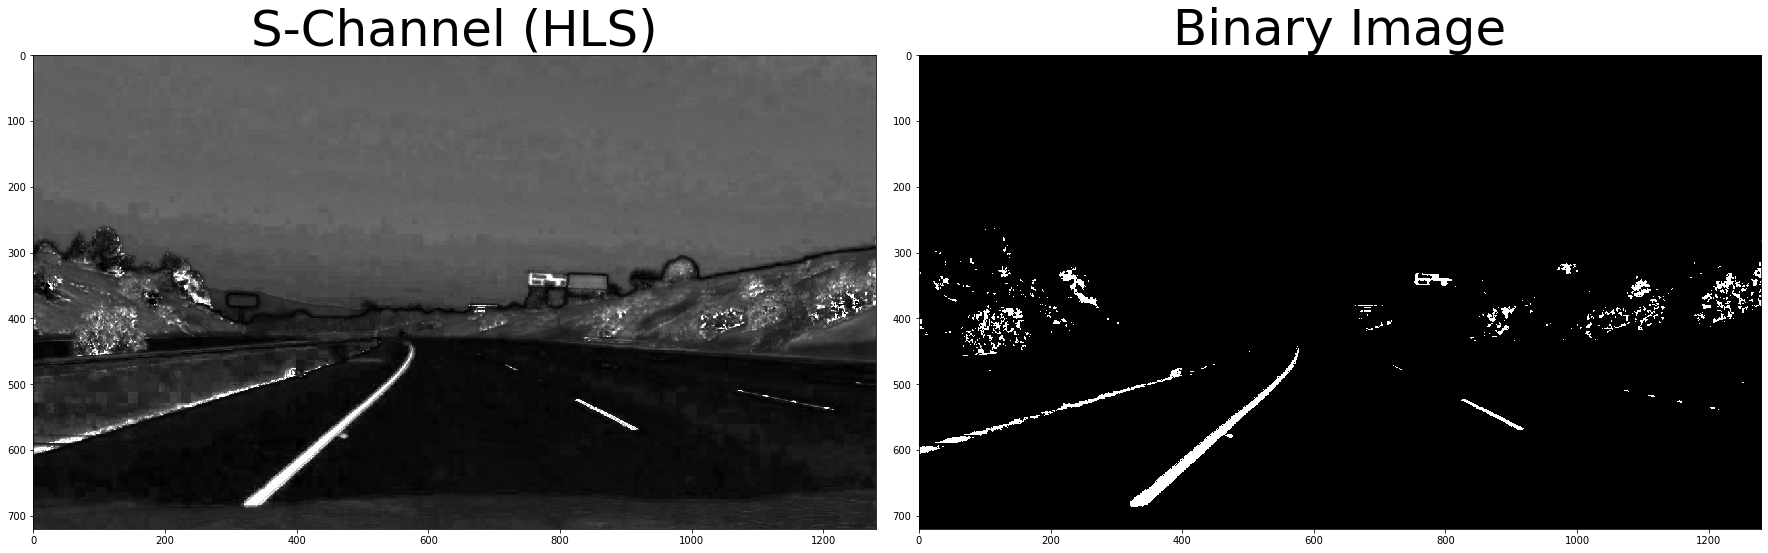

In [7]:
## Test Binary operation
img = cv2.imread('./test_images/img_0.jpg')
hls_img_lane = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
selected_channel = hls_img_lane[:,:,2]

sbinary = laneProcessing._binary(selected_channel, 120, 255)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('S-Channel (HLS)', fontsize=50)
ax2.set_title('Binary Image', fontsize=50)

ax1.imshow(selected_channel, cmap='gray')
ax2.imshow(sbinary, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

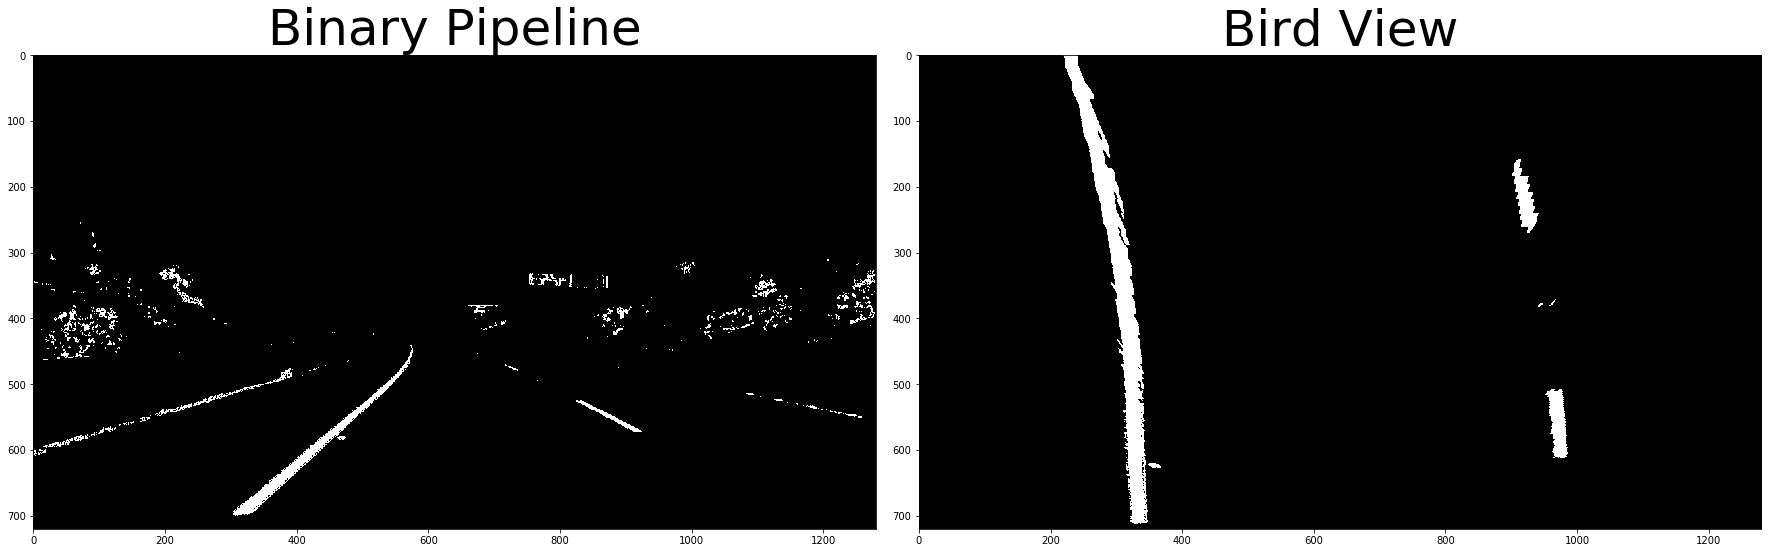

In [8]:
# Test Pipeline_binary
bgr_img = cv2.imread('./test_images/img_0.jpg')
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
binary = laneProcessing._pipeline_binary(img)
bird_view = laneProcessing._bird_view(binary)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Binary Pipeline', fontsize=50)
ax2.set_title('Bird View', fontsize=50)

ax1.imshow(binary, cmap='gray')
ax2.imshow(bird_view, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

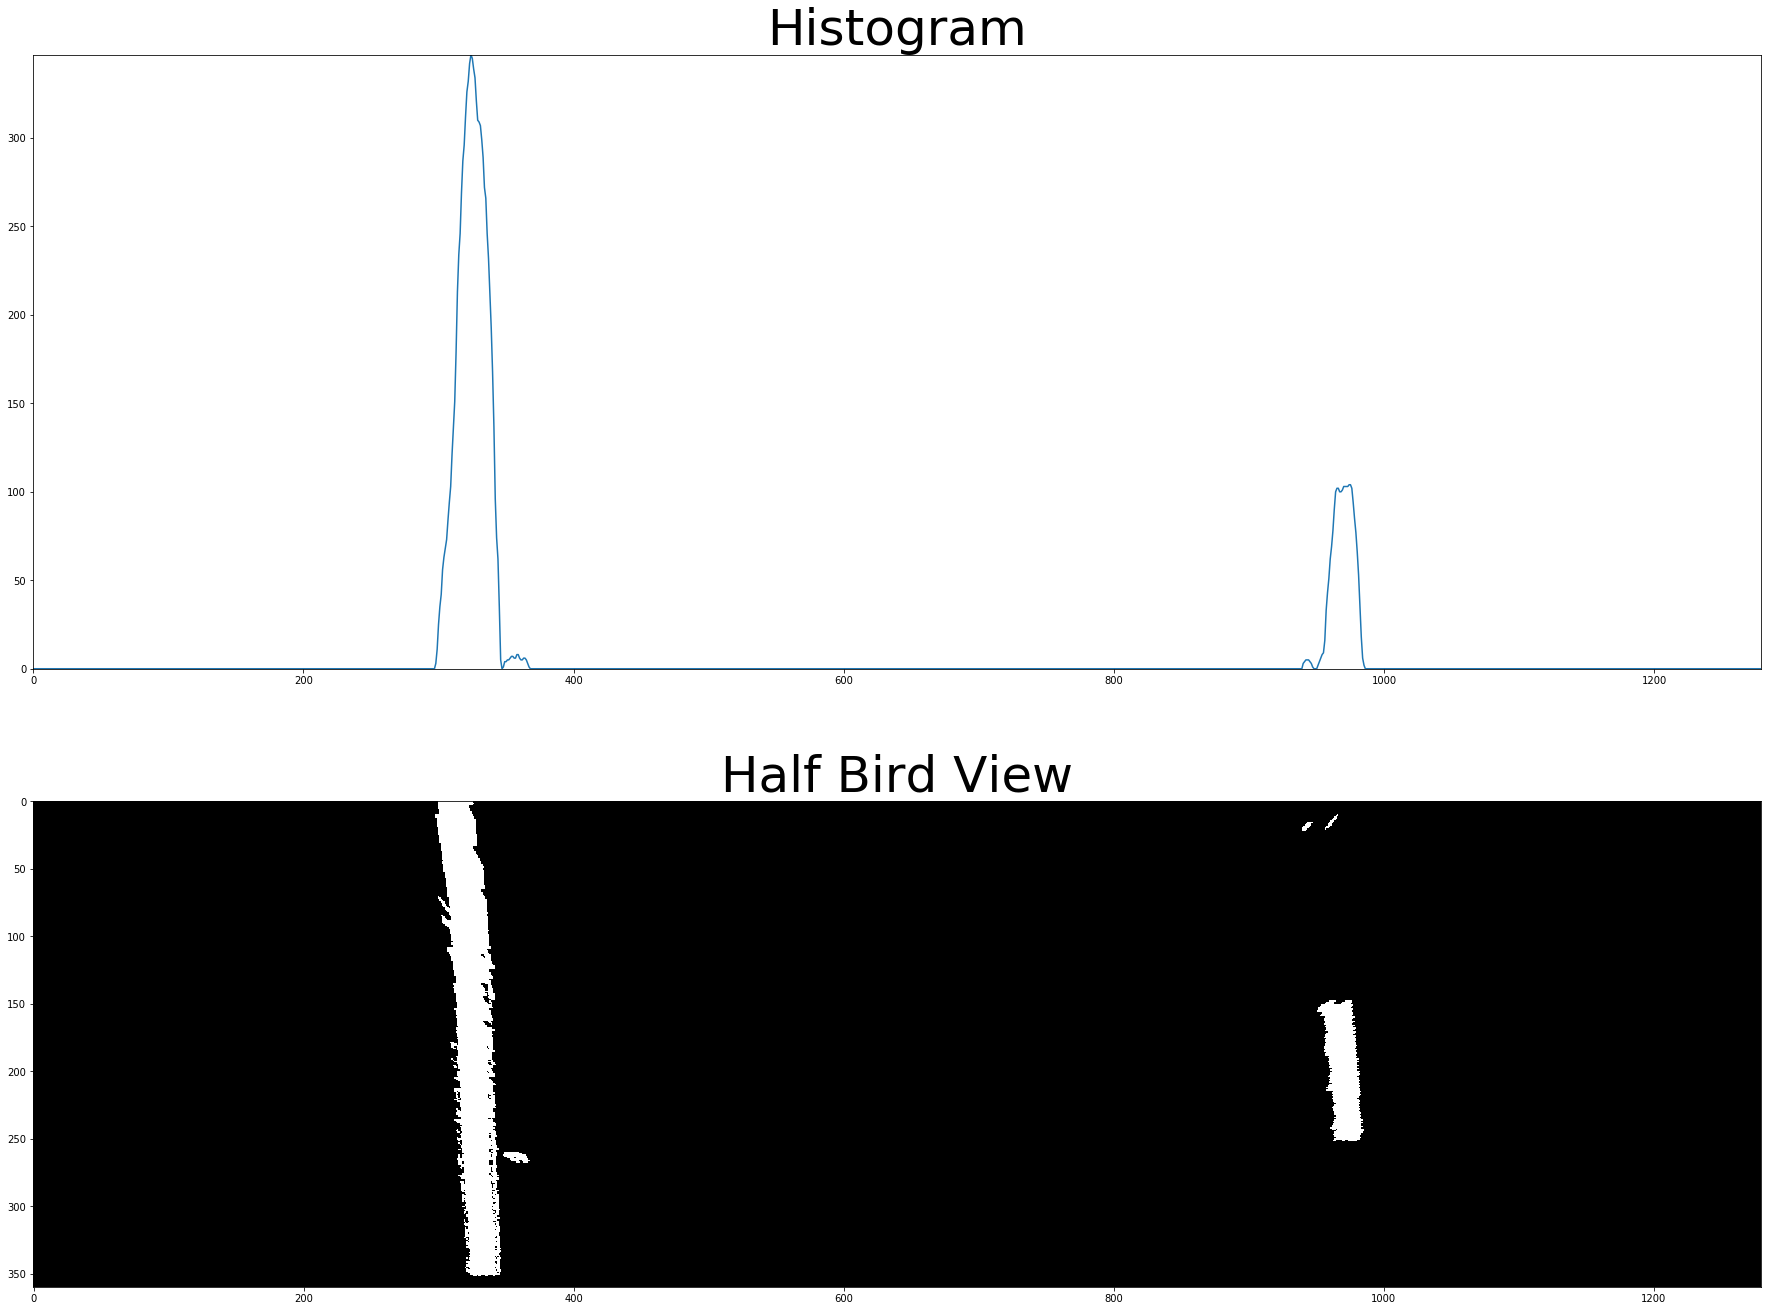

In [9]:
# Test left and right peak histogram operation
histogram, bottom_half = laneProcessing._lr_peaks_histogram(bird_view)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Histogram', fontsize=50)
ax2.set_title('Half Bird View', fontsize=50)

ax1.margins(0)
ax1.plot(histogram)
ax2.imshow(bottom_half, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)

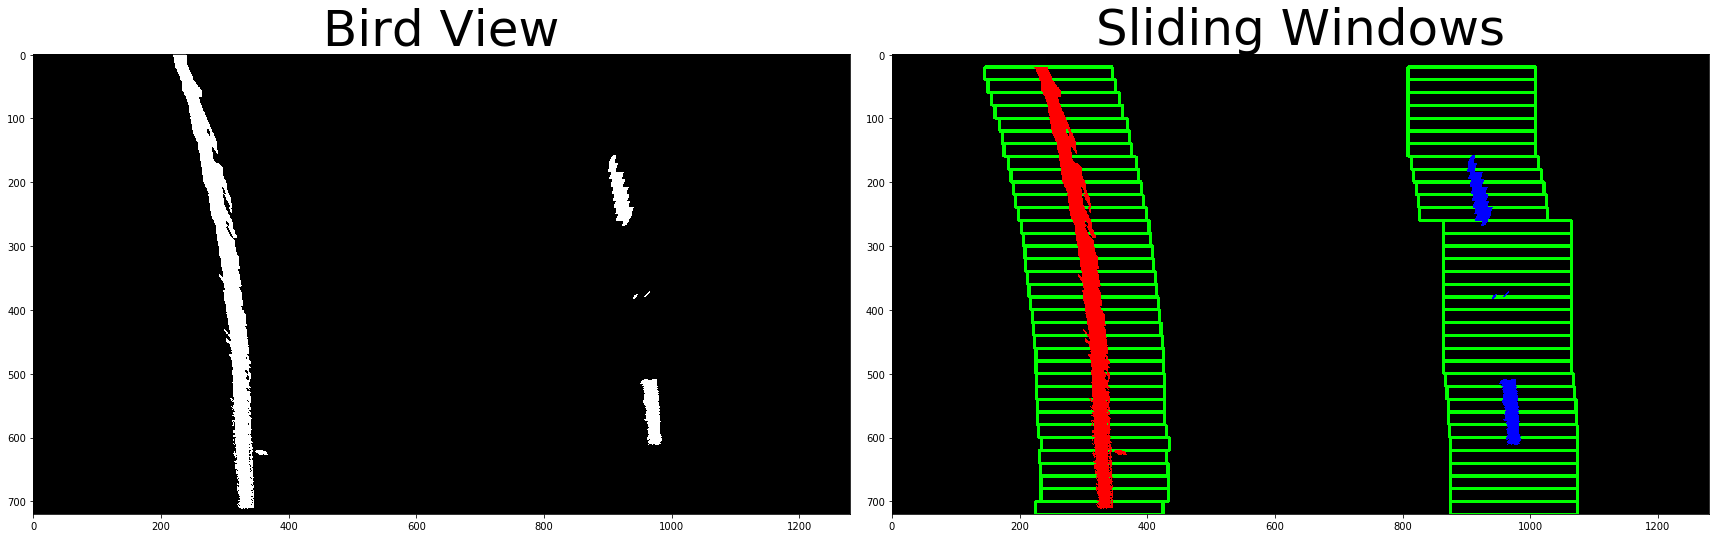

In [10]:
result = laneProcessing._first_lines(bird_view, draw_windows=True, update_fit=False)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Bird View', fontsize=50)
ax2.set_title('Sliding Windows', fontsize=50)

ax1.imshow(bird_view, cmap='gray')
ax2.imshow(result)

In [11]:
## Test Radious of curvature
def generate_data():
    '''
    Generates fake data to use for calculating lane curvature.
    In your own project, you'll ignore this function and instead
    feed in the output of your lane detection algorithm to
    the lane curvature calculation.
    '''
    # Set random seed number so results are consistent for grader
    # Comment this out if you'd like to see results on different random data!
    np.random.seed(0)
    # Generate some fake data to represent lane-line pixels
    fity = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in fity])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                    for y in fity])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(fity, leftx, 2)
    right_fit = np.polyfit(fity, rightx, 2)
    
    return fity, left_fit, right_fit

fity, left_fit, right_fit = generate_data()
avg_rad = laneProcessing._measure_curvature(fity, left_fit, right_fit)
print(avg_rad)

2253.0


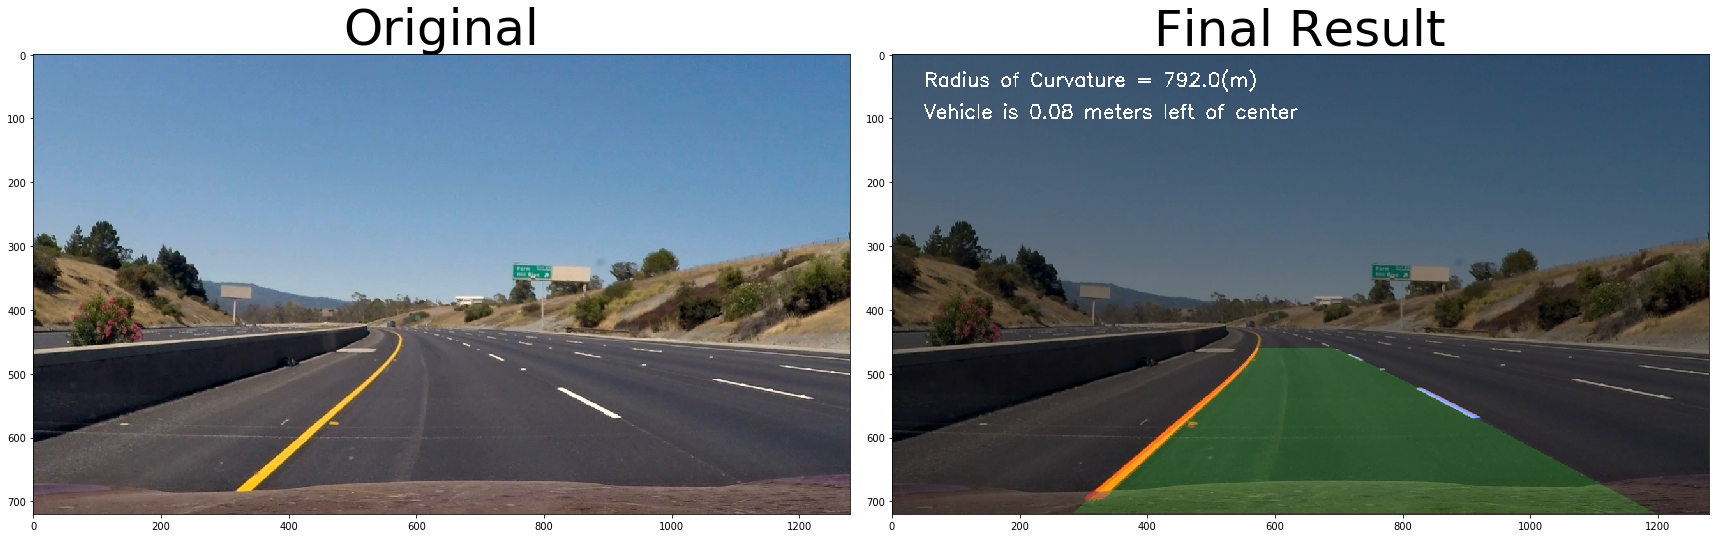

In [12]:
# Test Pipeline_binary
result = laneProcessing.process_image(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Original', fontsize=50)
ax2.set_title('Final Result', fontsize=50)

ax1.imshow(img, cmap='gray')
ax2.imshow(result)

f.savefig('results/final_result_comparative.png', bbox_inches='tight')

In [13]:
# script.main()

In [14]:
# script.generate_bird_view_video()